In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

[[ 1.38470000e+02  5.16550000e+01  9.78270000e+01 ...  2.15000000e+00
   4.44000000e-01  1.13497000e+02]
 [ 1.60937000e+02  6.87680000e+01  1.03235000e+02 ...  7.25000000e-01
   1.15800000e+00  4.62260000e+01]
 [ 1.21858528e+02  1.62172000e+02  1.25953000e+02 ...  2.05300000e+00
  -2.02800000e+00  4.42510000e+01]
 ...
 [ 1.05457000e+02  6.05260000e+01  7.58390000e+01 ...  1.80000000e+00
  -1.66000000e-01  4.19920000e+01]
 [ 9.49510000e+01  1.93620000e+01  6.88120000e+01 ... -3.27458741e-03
  -1.23928255e-02  0.00000000e+00]
 [ 1.21858528e+02  7.27560000e+01  7.08310000e+01 ... -3.27458741e-03
  -1.23928255e-02  0.00000000e+00]] [4, 5, 6, 12, 26, 27, 28]


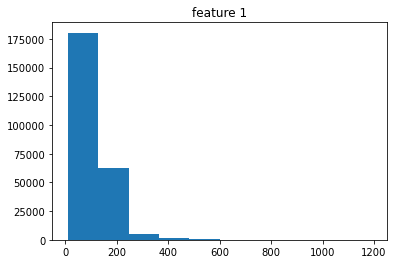

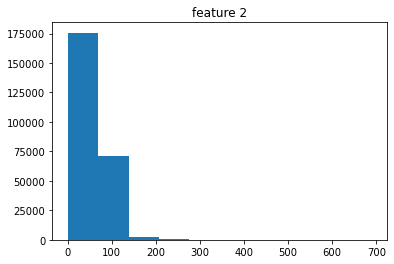

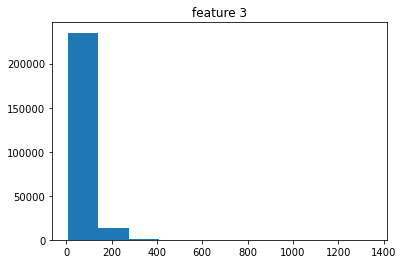

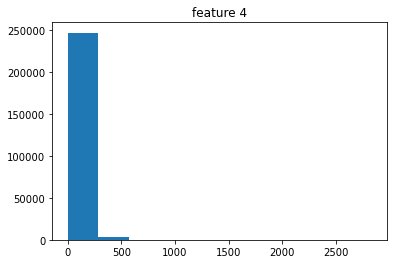

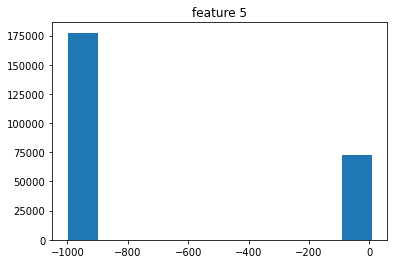

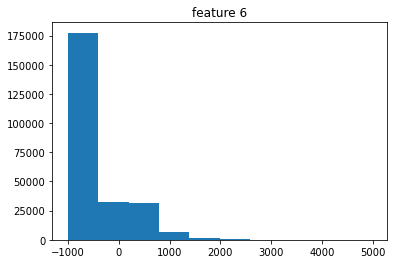

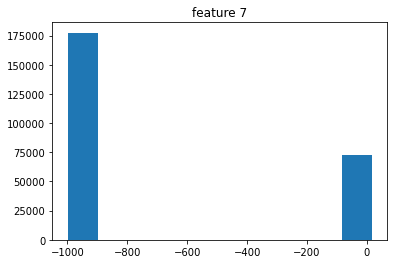

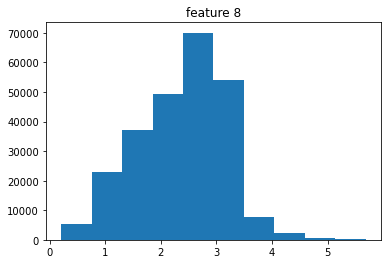

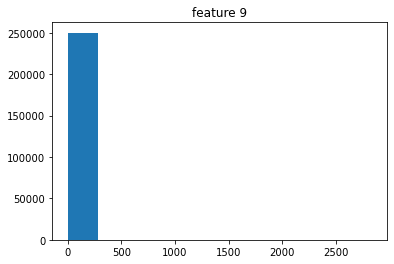

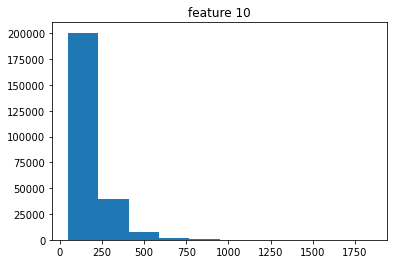

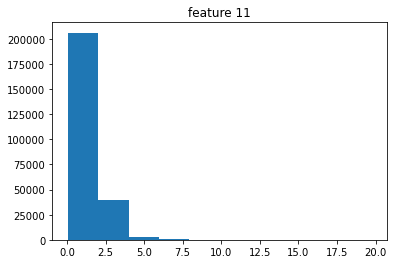

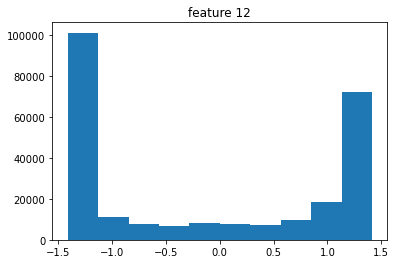

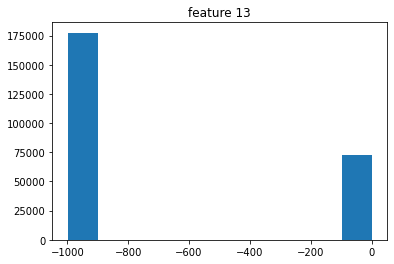

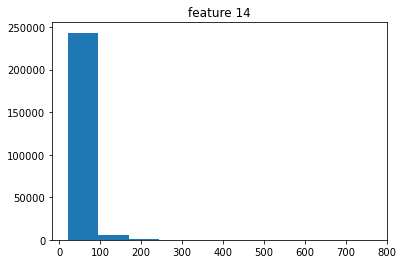

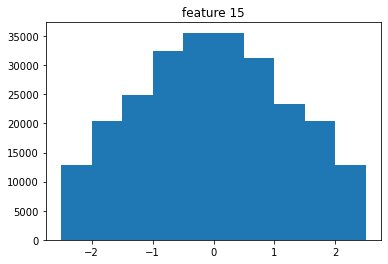

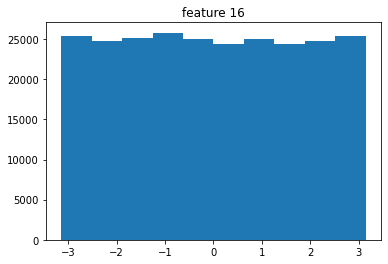

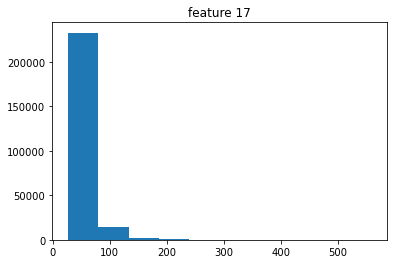

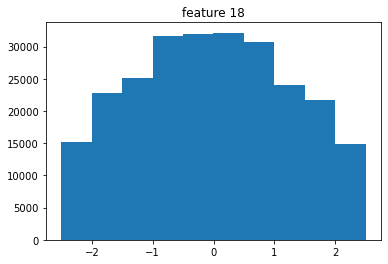

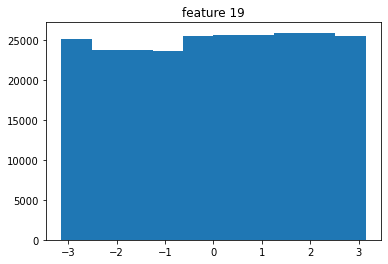

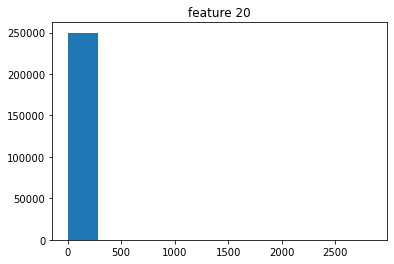

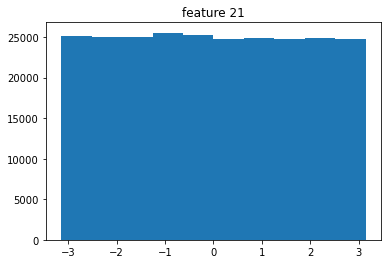

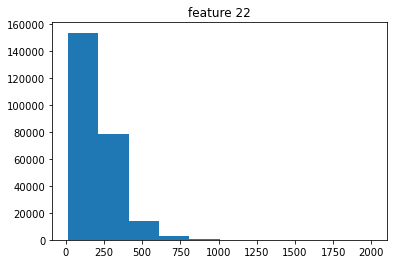

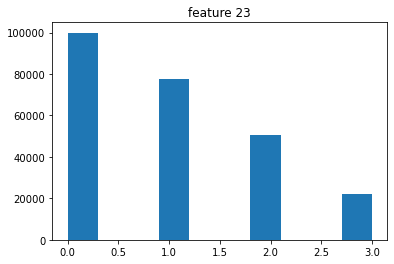

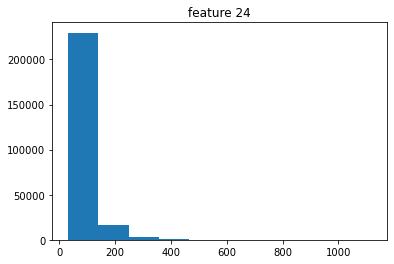

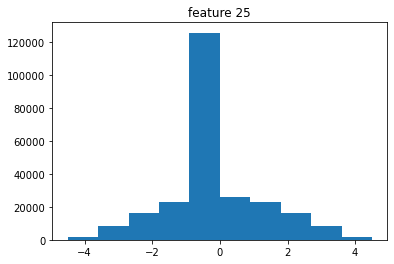

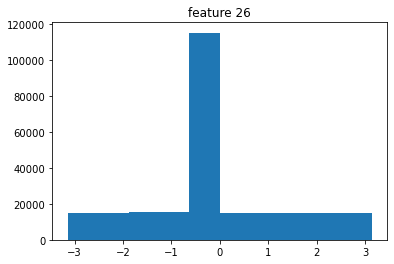

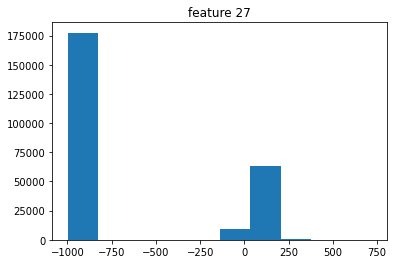

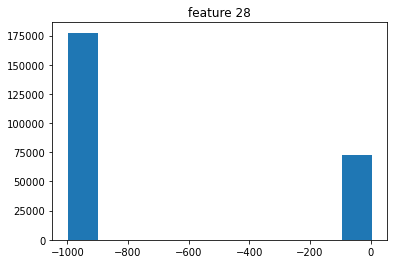

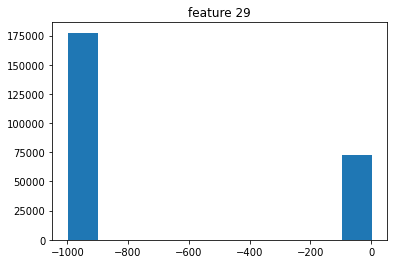

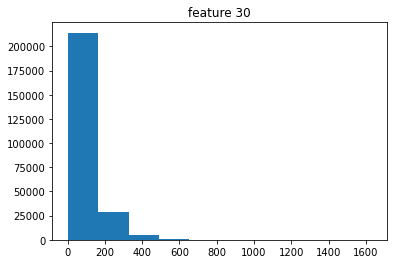

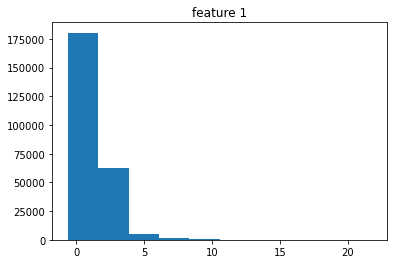

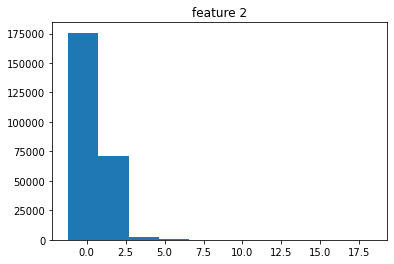

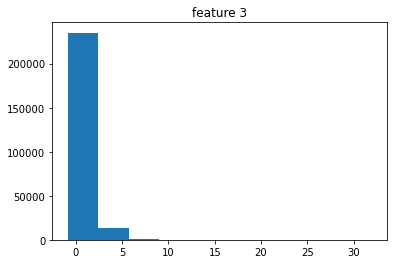

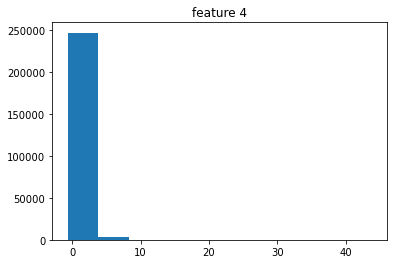

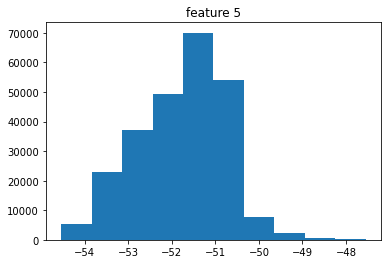

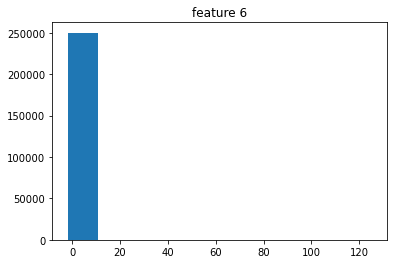

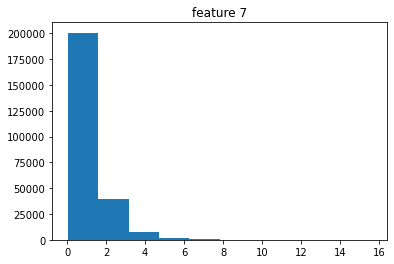

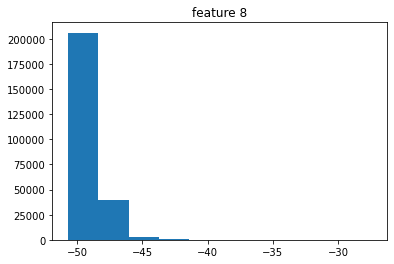

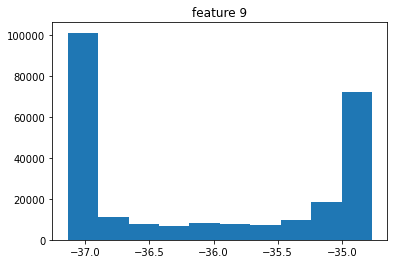

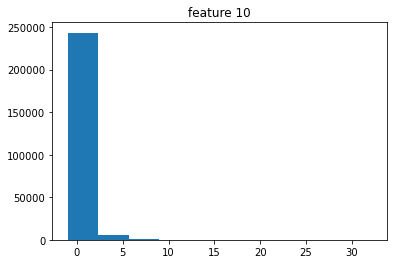

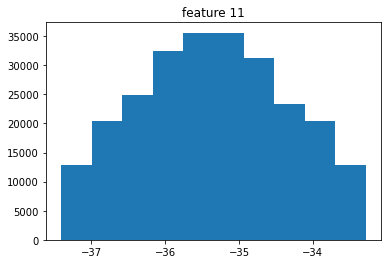

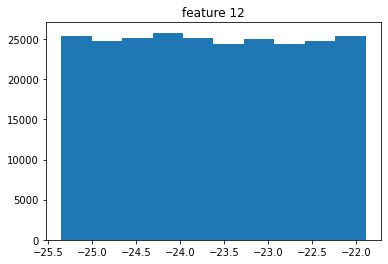

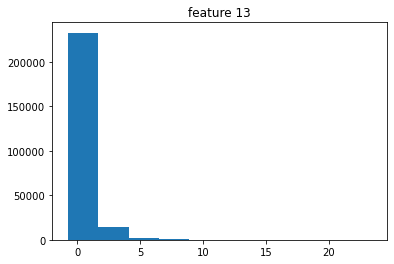

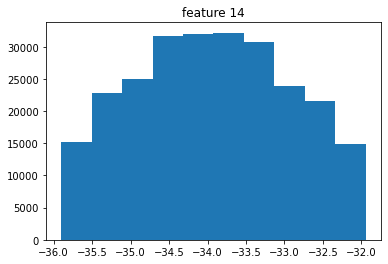

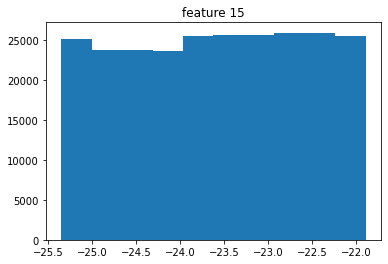

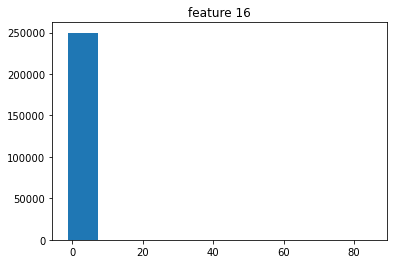

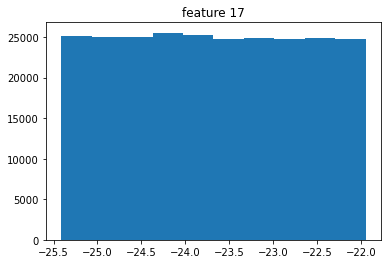

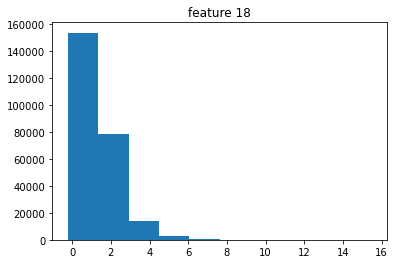

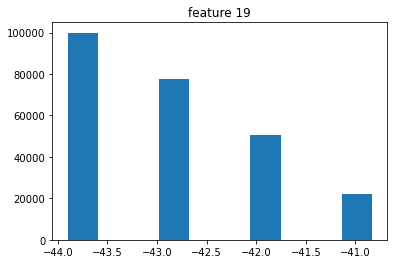

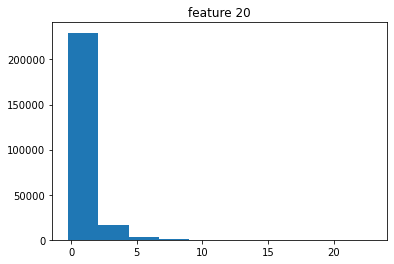

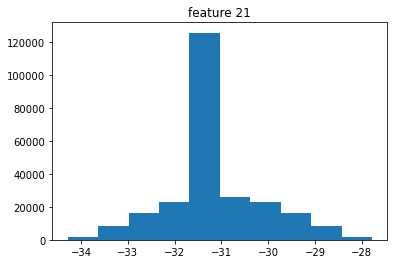

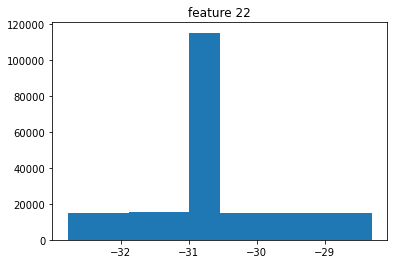

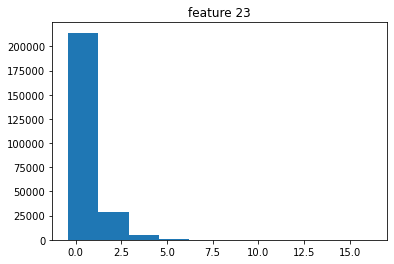

In [4]:
from data_analysis import *
from visualisation import *
from preprocessing import *
from implementations import *

## Do your thing crazy machine learning thing here :) ...

In [5]:
def least_squares_GD(y, tx, w_initial, max_iters, gamma):
    """Compute Least Squares with Gradient Descent"""
    """INPUTS : vector with data (tx, y), the initial w, the maximum number of iterations and the learning rate gamma"""
    """OUTPUTS : the weights w of the model """
    N = len(y)
    w = w_initial
    for i in range(max_iters) :
        sum_grad_loss = 0
        for j in range(N) : 
            sum_grad_loss+=(y[j]-tx[j].T*w)*tx[j]
        mse_grad_loss = (1/N)*sum_grad_loss
        w = w - gamma*mse_grad_loss
    sum_loss = 0
    for j in range(N) :
        sum_loss+=0.5*np.square((y[j]-tx[j].T*w))
    loss = (1/N)*sum_loss
    return (w, loss)

In [6]:
def least_squares(y, tx):
    """Compute Least Squares with normal equations"""
    """INPUTS : vector with data (tx, y)"""
    """OUTPUTS : the weights w of the model """
    w =  np.matmul(np.linalg.solve(np.matmul((tx.T), tx),(tx.T)), y)
    N = len(y)
    sum_loss = 0
    for j in range(N) :
        sum_loss+=0.5*np.square((y[j]-tx[j].T*w))
    loss = (1/N)*sum_loss
    return (w, loss)

In [7]:
def ridge_regression(y, tx, lambda_): 
    """Compute Ridge Regresssion with normal equations"""
    """INPUTS : vector with data (tx, y) and penalty parameter lambda_"""
    """OUTPUTS : the weights w of the model """
    N = len(y)
    w =  np.matmul(np.linalg.solve((np.matmul((tx.T), tx)+lambda_*2*N*np.identity(tx.shape[1])),(tx.T)), y)
    sum_loss = 0
    for j in range(N) :
        sum_loss+=0.5*np.square((y[j]-tx[j].T*w))
    loss = (1/N)*sum_loss + lambda_*np.sum(np.square(w))
    return (w, loss)

In [12]:
def least_squares_SGD(y, tx, w_initial, max_iters, gamma):
    """Compute Least Squares with Stochastic Gradient Descent"""
    """INPUTS : vector with data (tx, y), the initial w, the maximum number of iterations and the learning rate gamma"""
    """OUTPUTS : the weights w of the model """
    N = len(y)
    w = w_initial
    i=0
    while i<max_iters :
        for j in range(N) : 
            mse_grad_loss = -2*tx[j]*(y[j]-np.dot(w,tX[j]))
            w = w - gamma*mse_grad_loss
            break
        i+=1
        break
    sum_loss = 0
    for j in range(N) :
        sum_loss+=0.5*np.square((y[j]-tx[j].T*w))
    loss = (1/N)*sum_loss
    return (w, loss)

In [13]:
#Try with all data

initial_w = np.zeros(tX.shape[1])
max_iters = 100
gamma = 1e-3

## Test on some small data
#weights, loss = logistic_regression(y[:30000], tX[:30000], initial_w, max_iters, gamma)
#(weights, loss) = least_squares(y[:30000], tX[:30000]) #works
#(weights, loss) = ridge_regression(y[:30000], tX[:30000], gamma) #works
(weights, loss) = least_squares_SGD(y[:30000], tX[:30000], initial_w, max_iters, gamma)

print(loss)
y_pred = predict_labels(weights, tX[30000:])
print(np.dot(tX[30000:], weights))
print(weights.shape)

accuracy = np.sum(y_pred==y[30000:]) / y_pred.shape[0]

print(accuracy)

#create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

[6.83007757e+02 2.30558407e+01 1.62551144e+02 1.27963018e+01
 1.15302776e+00 2.45678669e+04 9.02335079e+00 5.04648176e-01
 4.87422341e+00 3.02741713e+03 5.01971833e-01 4.99057302e-01
 4.43101794e-01 5.21360502e+00 4.99999863e-01 4.99993046e-01
 1.63405586e+01 4.99969699e-01 4.99957386e-01 2.64327393e+00
 5.00013931e-01 8.07227965e+03 5.00786464e-01 8.88387504e+01
 5.00004409e-01 4.99998731e-01 2.97485923e+03 1.96761962e+00
 1.05494994e+01 3.88787675e+02]
[-233.60753249  559.22670433 -144.30743214 ... -118.56716364 -205.63537742
 -185.95824873]
(30,)
0.6212136363636364


In [14]:
#Try with normalized data

initial_w = np.zeros(tX.shape[1])
max_iters = 100
gamma = 1e-3

## Test on some small data
#weights, loss = logistic_regression(y[:30000], tX[:30000], initial_w, max_iters, gamma)
#(weights, loss) = least_squares(y[:30000], tX[:30000]) #works
#(weights, loss) = ridge_regression(y[:30000], tX[:30000], gamma) #works
(weights, loss) = least_squares_SGD(y[:30000], normalized_x[:30000], initial_w, max_iters, gamma)

print(loss)
y_pred = predict_labels(weights, normalized_x[30000:])
print(np.dot(normalized_x[30000:], weights))
print(weights.shape)

accuracy = np.sum(y_pred==y[30000:]) / y_pred.shape[0]

print(accuracy)

#create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

ValueError: operands could not be broadcast together with shapes (30,) (23,) 

In [6]:
#Quick testing of functions
w_initial = np.ones(30)
max_iters=10
gamma = 0.1
lambda_ = 0.01
w_lsgd = least_squares_GD(y, tX, w_initial, max_iters, gamma)
w_lssgd = least_squares_SGD(y, tX, w_initial, max_iters, gamma)
w_ls = least_squares(y, tX)
w_rg = ridge_regression(y, tX, lambda_)

<ipython-input-3-2388e52d1166>:9: RuntimeWarning: overflow encountered in multiply
  mse_grad_loss = (y[j]-tx[j].T*w)*tx[j]
<ipython-input-3-2388e52d1166>:9: RuntimeWarning: invalid value encountered in multiply
  mse_grad_loss = (y[j]-tx[j].T*w)*tx[j]


MemoryError: Unable to allocate 466. GiB for an array with shape (250000, 250000) and data type float64

In [ ]:
print(w_lsgd, w_lssgd, w_ls, w_rg)

## Generate predictions and save ouput in csv format for submission:

In [20]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [21]:
OUTPUT_PATH = '../output' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)

PermissionError: [Errno 13] Permission denied: '../output'

In [22]:
y_pred

array([ 1., -1.,  1., ...,  1.,  1.,  1.])